# Linear Classification

## 1. Logistic regression

### Def
- Logistic regression is a classification algorithm for categorical variables.

### Application
- binary data: 0/1
- probablistic results
- linear decision boundary
- undertand the impact of the feature

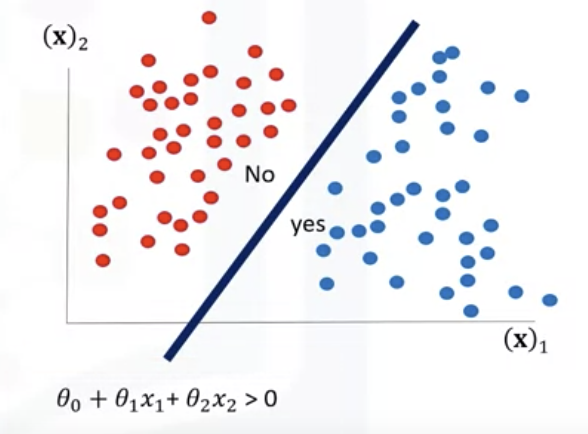


## 2. Logistic Regression vs Linear Regression

#### Flaw of Linear Regression => The advantage of activation function

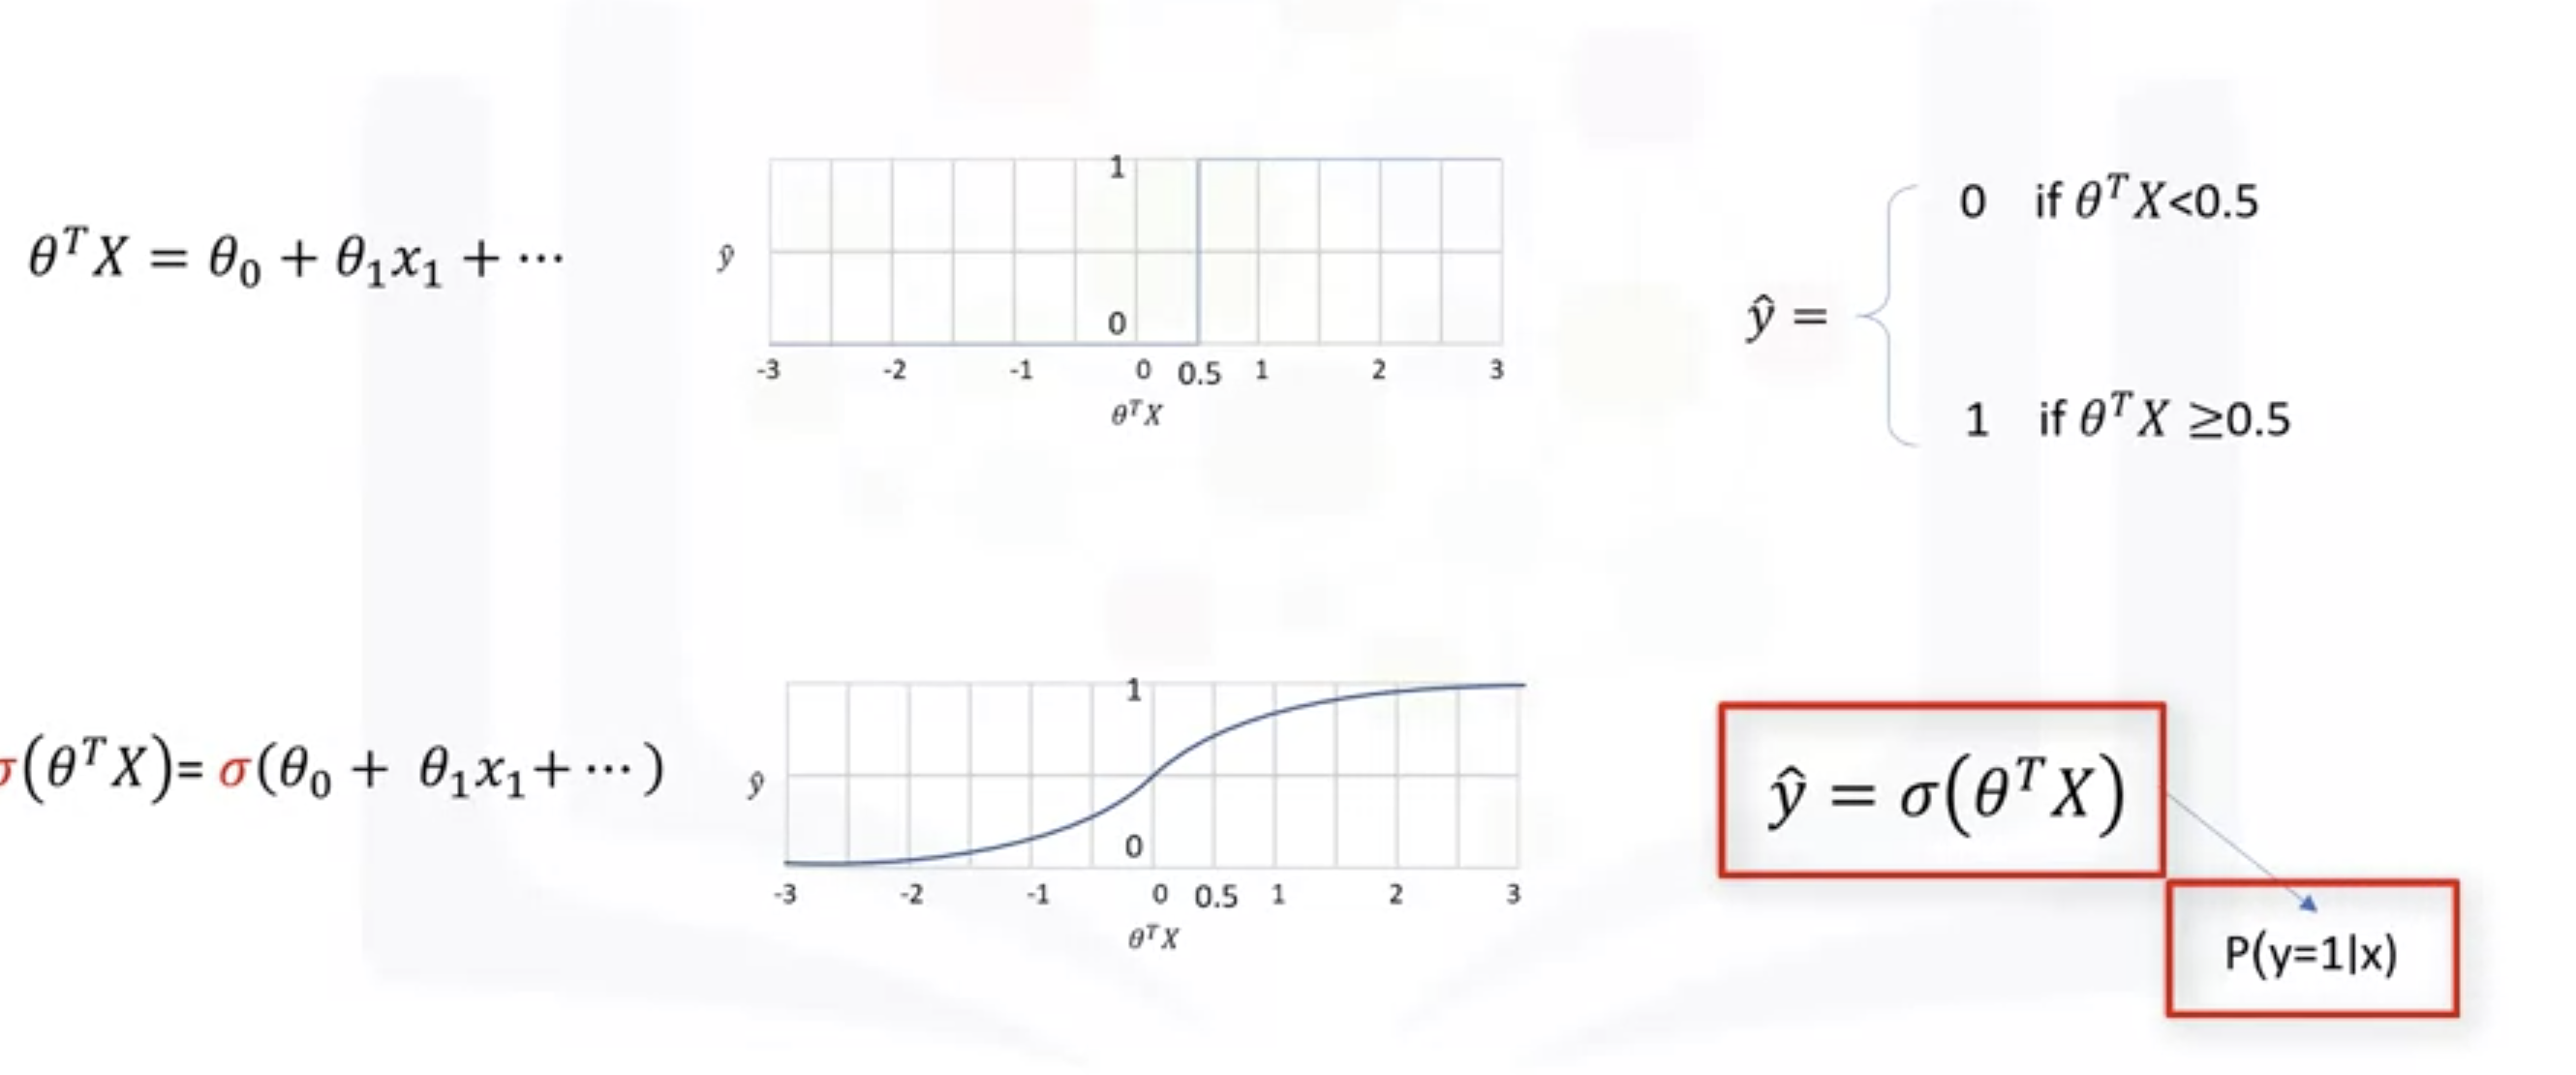

#### Logistic Regression: linear regression + activation function (sigmoid):

$$
\sigma(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}}
$$

$$x \rightarrow +\infty \Rightarrow P(y = 1|x) \rightarrow 1$$
$$x \rightarrow -\infty \Rightarrow P(y = 1|x) \rightarrow 0$$

#### Training process

1. Initialize $\theta$
2. Calculate the linear combination $\hat y = \sigma(\theta^T X)$
3. Calculate the error: the difference between $\hat y$ and the actual output y
4. Change the $\theta$ to reduce the cost


#### General cost function

- Change the weight -> reduce the cost
- Cost function: 
$$
Cost(\hat y, y) = \frac{1}{2}(\sigma(\theta^T X) - y)^2
$$
$$
J(\theta) = \frac{1}{m}\sum_{i - 1}^m Cost(\hat y, y)
$$

#### To minimize the cost function of the model by using Gradient Descent: use the derivative of a cost function to change the parameter values, in order to minimize the cost.

$$
\frac{\partial J}{\partial \theta_1} = - \frac{1}{m} \sum_{i = 1}^m (y^i - y \hat y^i) x_1^i)
$$

$$
\nabla J = 
\begin{bmatrix}
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\frac{\partial J}{\partial \theta_3} \\
...\\
...\\
\frac{\partial J}{\partial \theta_k} 
\end{bmatrix}
$$

$$\Rightarrow New \theta = old \theta - \eta \nabla J$$

## 2. SVM (Support Vector Machine)

### Def: SVM is a supervised algorithm that classifies cases by finding a separator.
1. Mapping data to a high-dimensional features space
2. Finding a separator

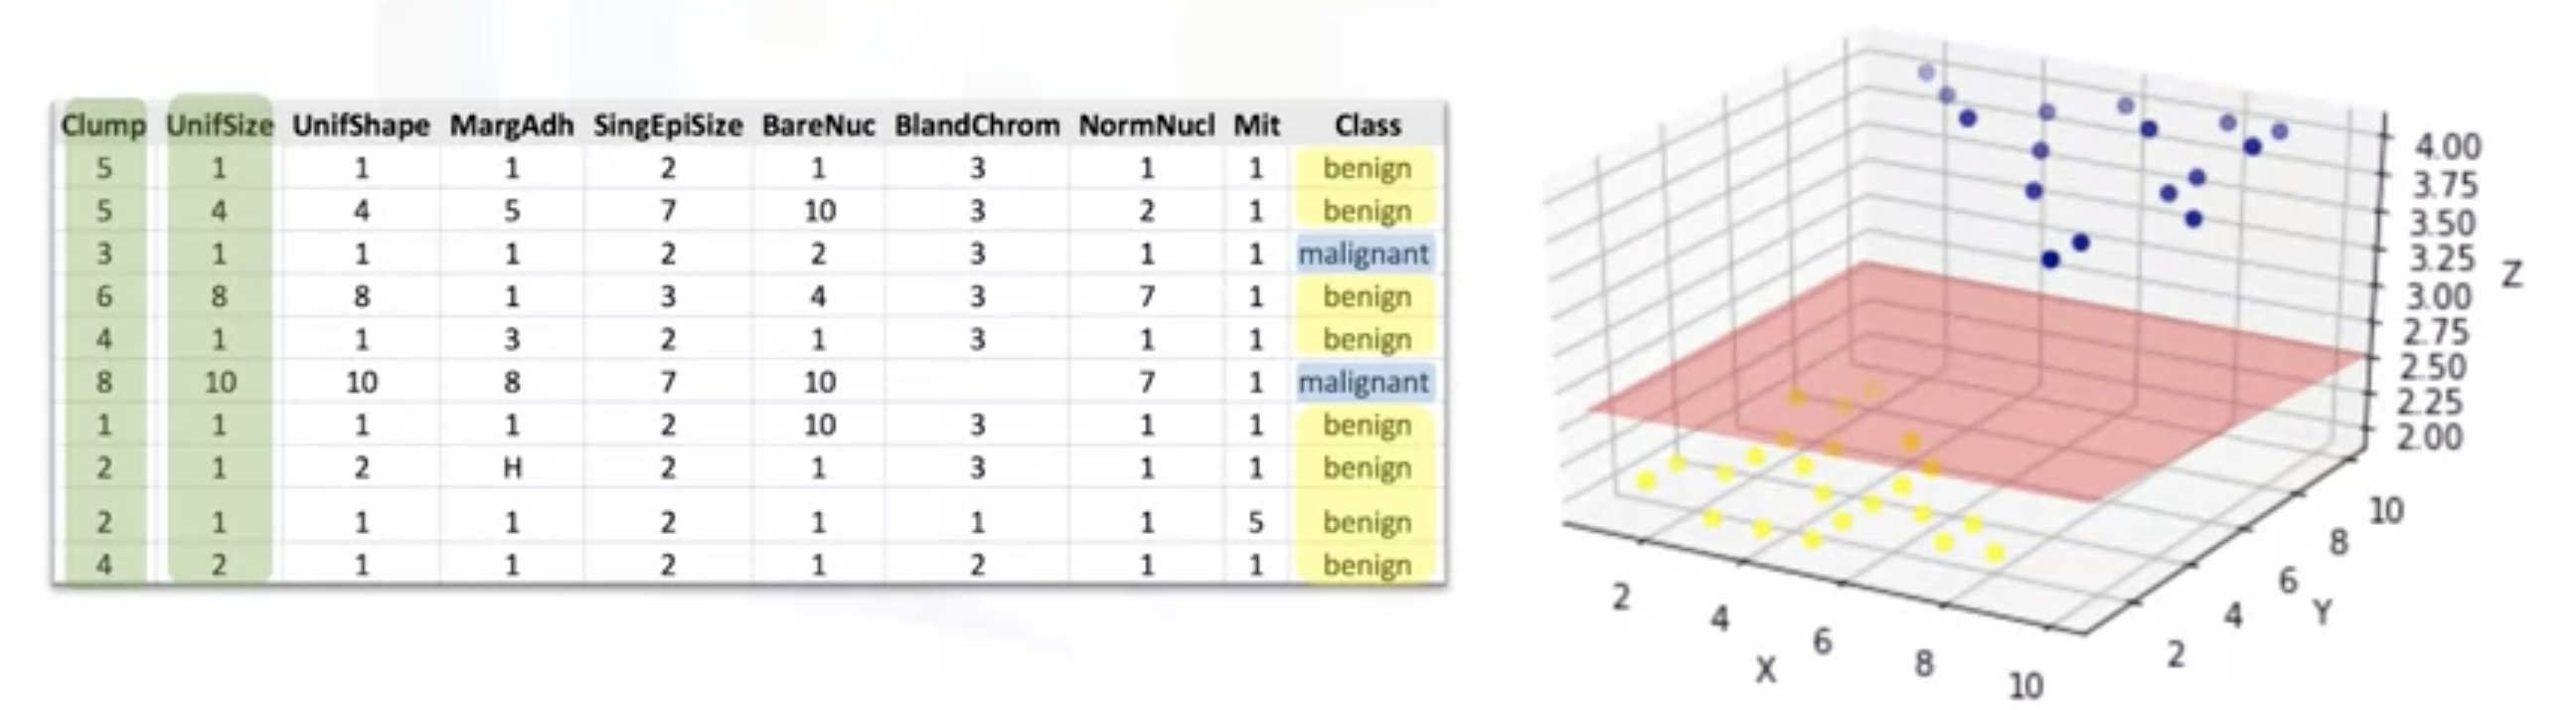

#### Not transform the separator, But transform the data from [Not linear separable] to [Linear separable]

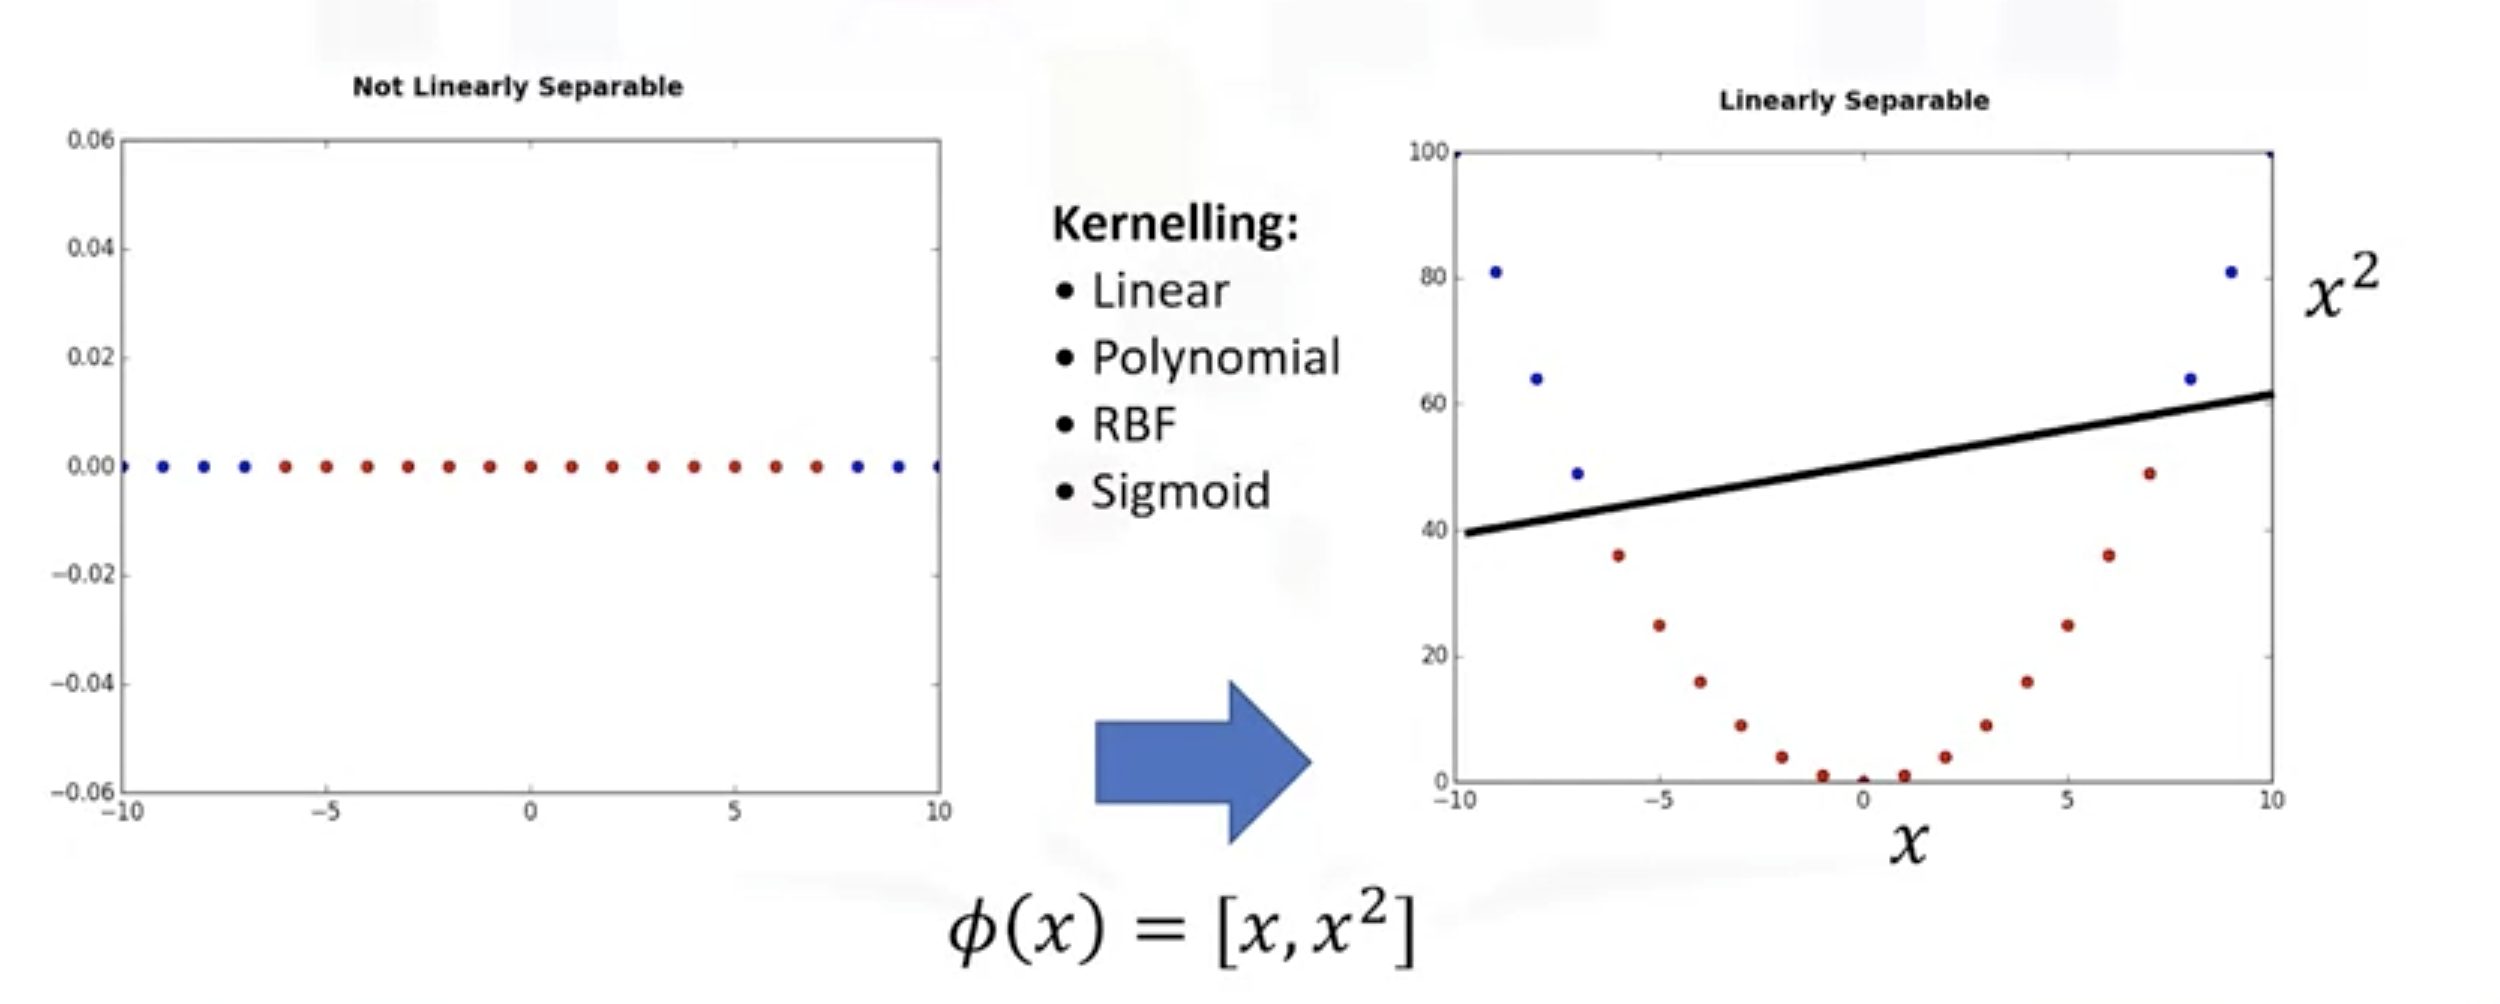



#### Using SVM to find the hyperplane:

- Find w and b such that $\Phi(w) = \frac{1}{2}w^T w$ is minimized and for all $\{(x_i, y_i)\}: y_i(w^Tx_i + b) \geq 1$.


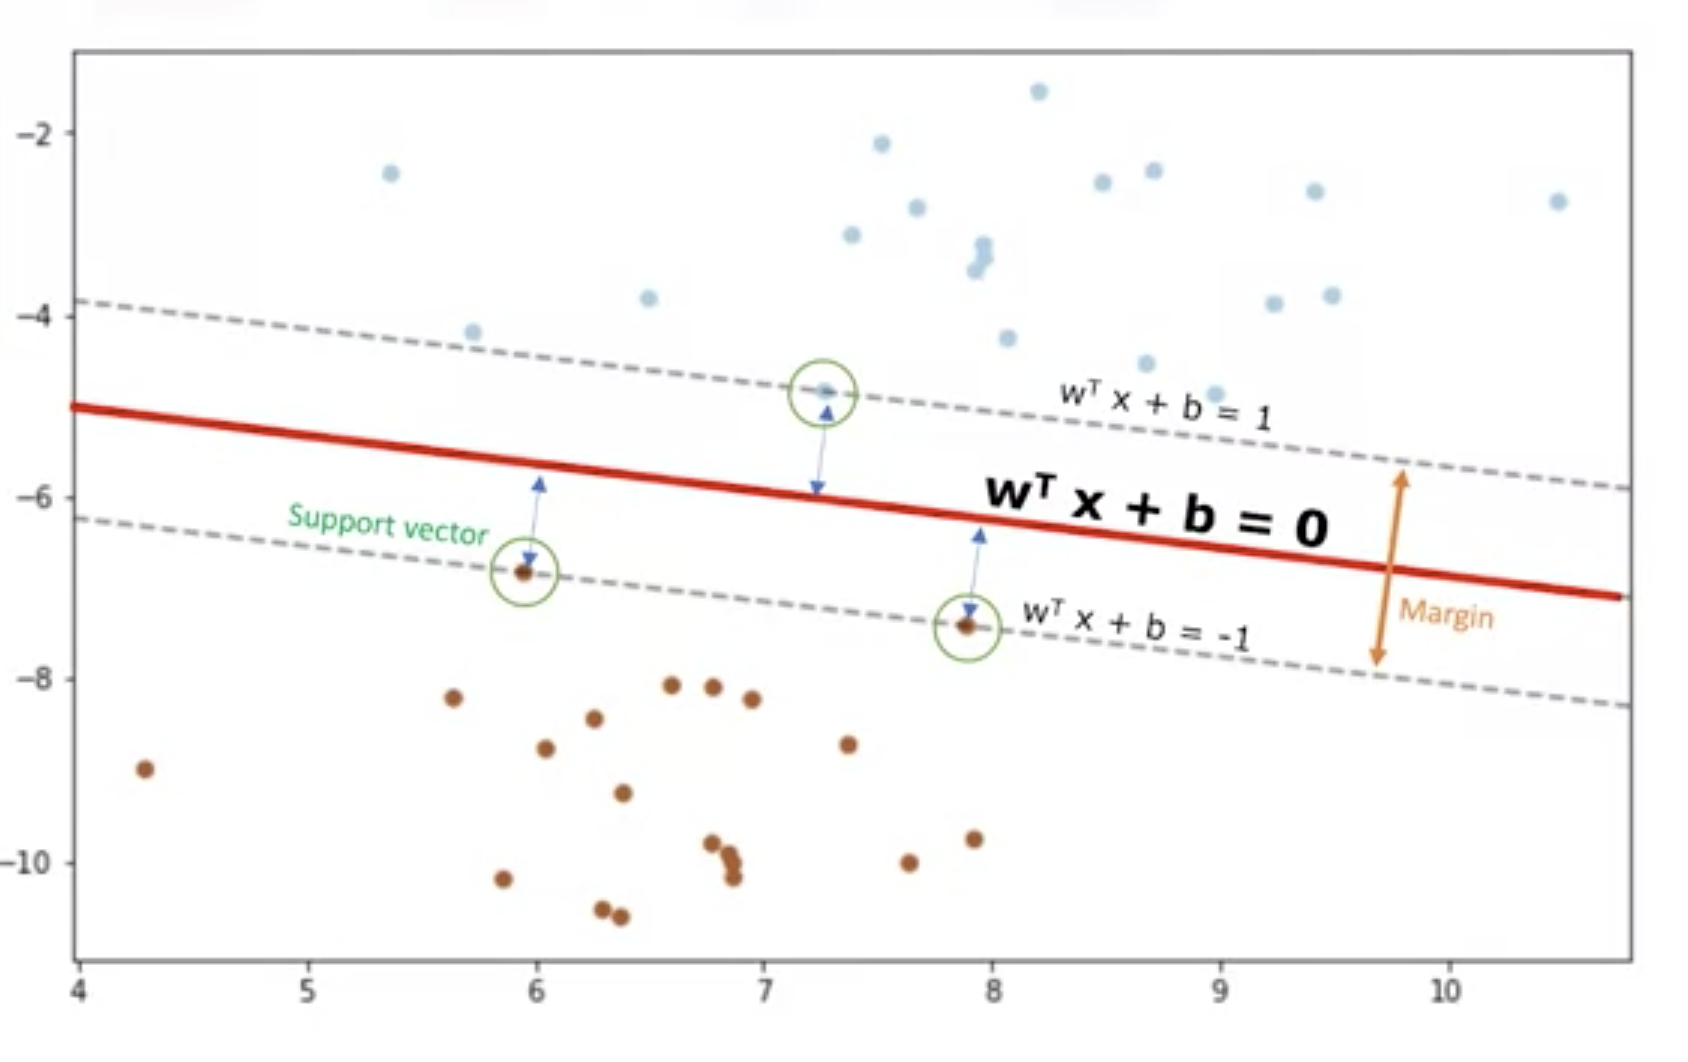


#### Pros and Cons of SVM
1. Pros: 
- Accuate in high-dimensional spaces
- Memory efficient
2. Cons:
- Prone to over-fitting
- No probability estimation
- Small datasets

#### SVM Applications
- Image recognition
- Text category assignment
- Detecting Spam
- Sentiment analysis
- Gene Expression Classification
- Regression, outlier detection and clustering

## 3. Multi-class Prediction

- In order to classify data into multiple class labels.
- Unlike classification trees / KNN, Multi-class Prediction is not straightforward.
- It can be converted by Logistic Regression by using multinormal logistic regression / softmax regression => Generalization of logistic regression.
- One vs. All (One-vs-Rest) & One vs One are two other multi-class classification techniques, to convert most two-class classifiers to a multi-class classifier.

### 3.1 Softmax Regression

- Softmax Regression $\approx$ Logistic Regression
- It converts FROM the actual distance (dot products of x with each $\theta_i$ for K classes in the range from 0 to K-1)
- TO the probabilities:
$$
softmax(x, i) = \frac{e^{-\theta_i^T X}}{\sum_{j = 1}^K e^{-\theta_j^T x}}
$$

- Training procedure = logistic regression using cross-entropy, but the prediction is different.

Consider the three-class example where $y \in\{0, 1, 2\}$, to classify x by using SoftMax function to generate a probability of how likely the sample belongs to each class. 

Then we can make a prediction using the argmax function:
$$
\hat y = argmax_i(softmax(x, i))
$$

- For Example:

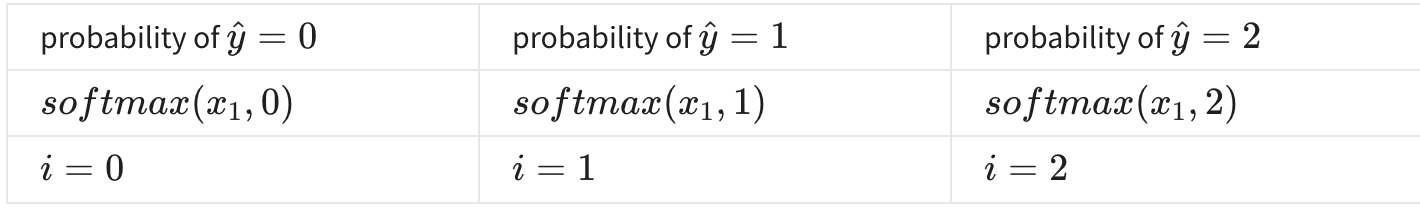

- The output:

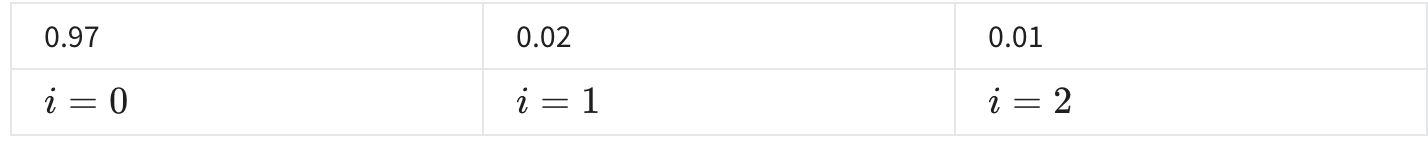

We can represent the probability as a vector [0.97, 0.02, 0.01]:
$$
\hat y = argmax_i([0.97, 0.02, 0.01]) \\
\hat y = 0
$$

### Geometric Interpretation

Each $\theta_i^Tx$ is the equation of a hyperplane, we plot the inetrsection of the three hyperplane with 0.

- if the input is in the blue region, the sample would be classified as $\hat y = 0$.
- if the input is in the red region, the sample would be classified as $\hat y = 1$.
- if the input is in the yellow region, the sample would be classified as $\hat y = 2$.

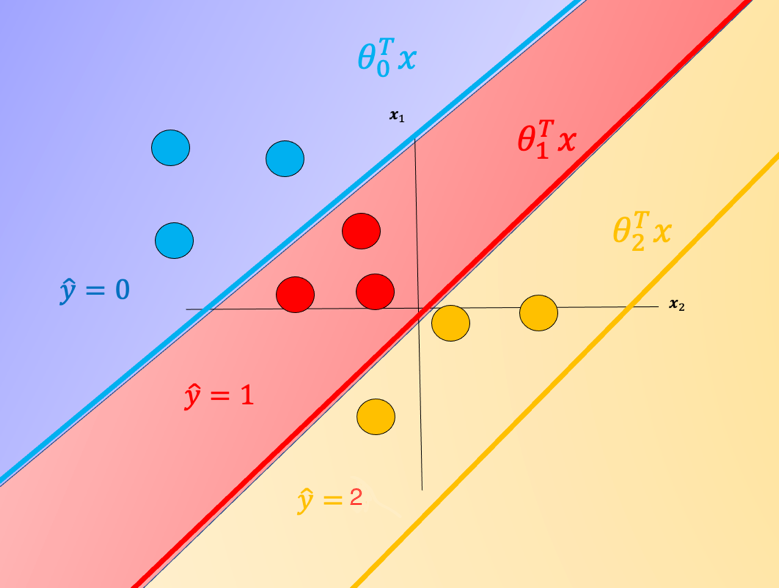

One problem with Softmax Regression with cross-entropy is it cannot be used for SVM and other types of two-class classifiers.


### One vs. All (One-vs-Rest)

#### Def:
- For one-vs-all classification, if have K classes, then use K two-class classifier models
- the number of class labels = the number of generated classifiers

#### Steps:
1. Create an artificial class: "dummy" class
2. for each classifier, Split the data into two classes
- Class 1: class samples, which we want to classify
- Class 2: the rest of samples, which are labelled as a dummy class
3. Repeat the process for each class.
4. Make a classification by using majortiy vote / the classifier with the highest probability (disregarding the probabilities generates for the dummy class).

#### Classifiers value
- Although classifiers such as logistic regression: {0, 1} and SVM class: {-1, 1}, we will use **arbitrary class values**.


#### Example: y = 0 for blue, y = 1 for red, y = 2 for yellow
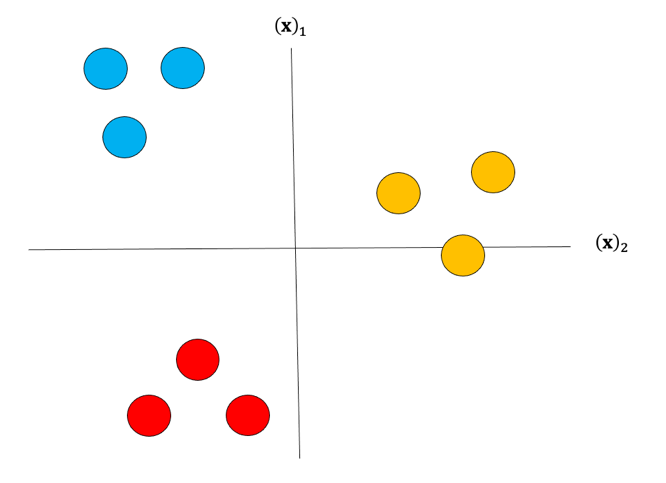

- Step 1. Build a classifier for the blue class to specify. Others are the dummy classes: $\hat y$ in the purple region is the dummy class, $\hat y = dummy$.
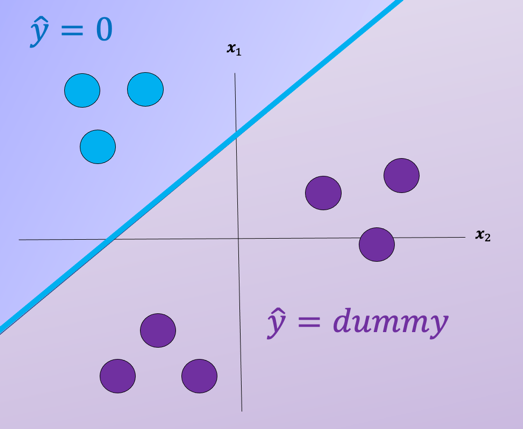

- Repeat for each class: red and yellow
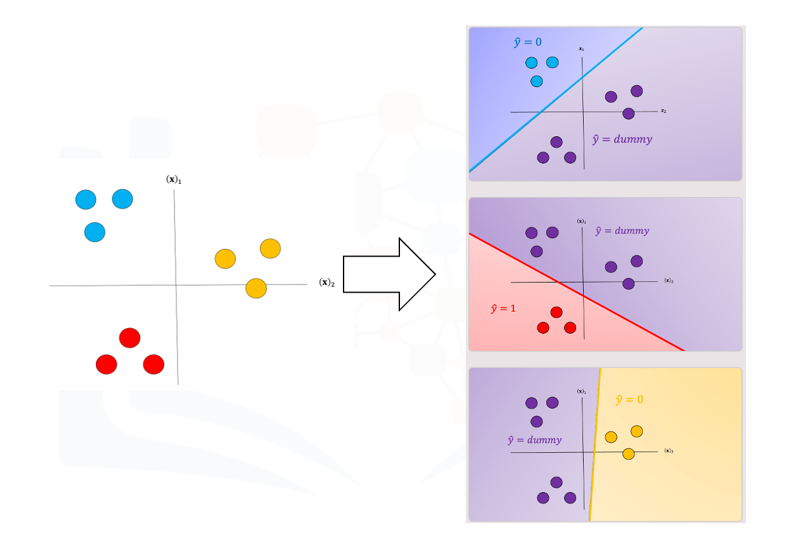
- $\hat y = 0, 1, 2$ in blue, red, yello region
- $\hat y = dummy$ in purple region

- Combine the regions overall
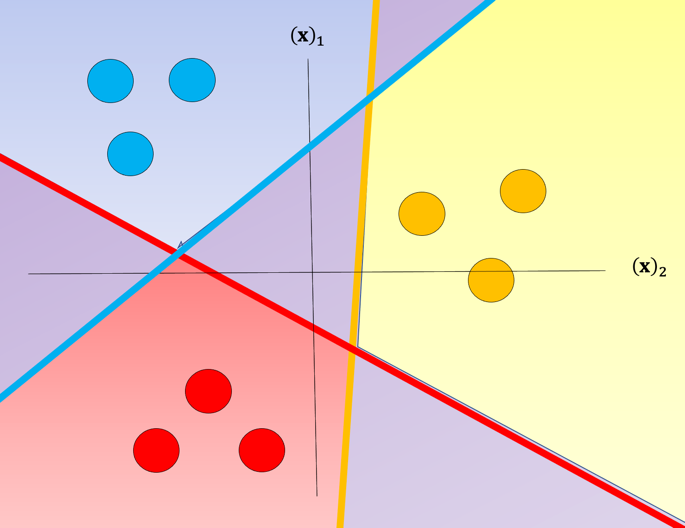

- There are still ambiguous regions remained (purple region), reduce it by finding the probability of a sample belonging to the actual class.
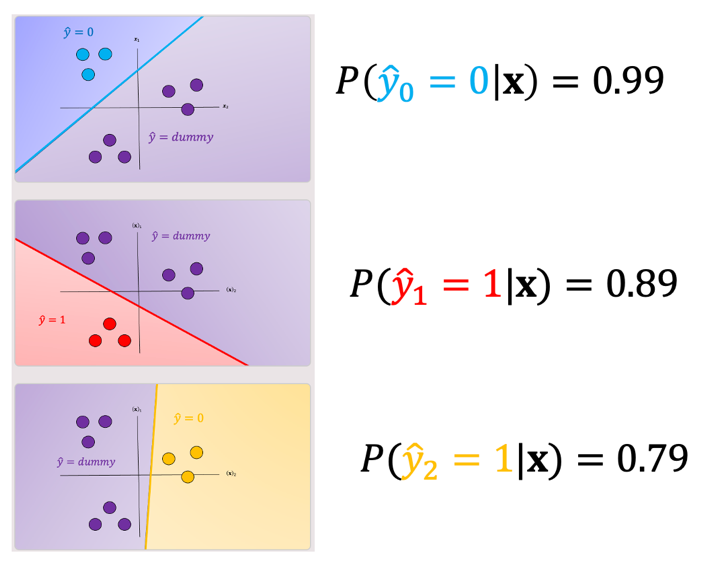

## One-vs-One Classification

### Steps 
1. Split up the data into each class
2. Train a two-class classifier on each pair of classes. 

### Example: class 0,1, and 2
- Step 1. 
- train one classifier on the samples that are class 0 and class 1
- a second classifier on samples that are of class 0 and class 2
- a final classifier on samples of class 1 and class 2.

Such as the example of class 0 vs class 1: we drop training samples of class 2:

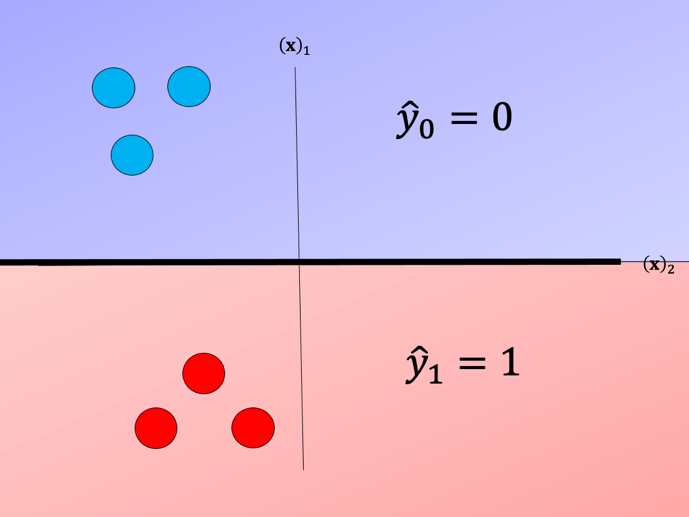

- The color of the training samples are based on their class. 
- The separating plane of the classifier is in black.  
- The color represents the output of the classifier for that particular point in space.  


- Step 2. Repeat the process for each pair of classes.
- For K classes, we need to train K(K - 1)/2 classifiers (If K = 3, we have (3x2)/2=3 classifers.
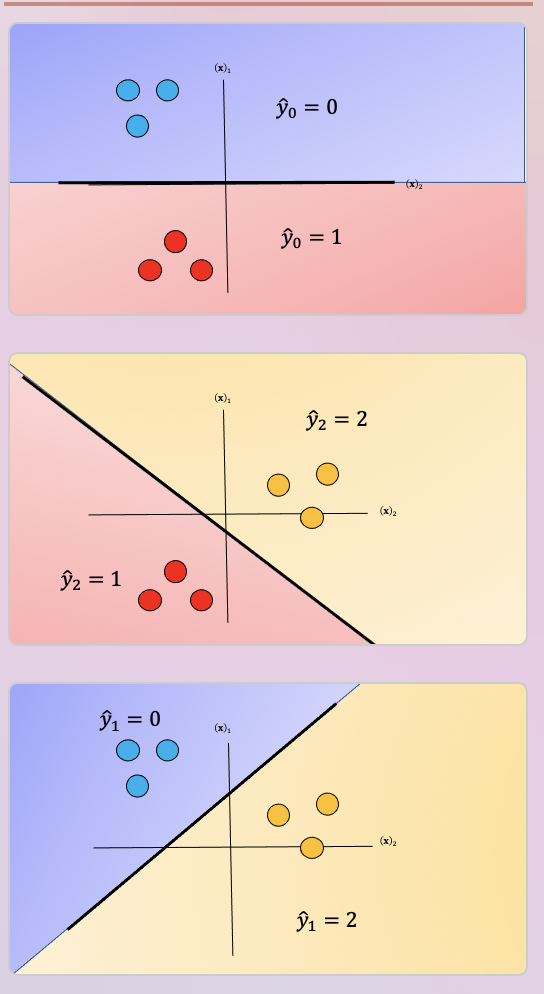

- Step 3. Perform Classification on a sample by a majority vote (select the class with the most predictions).  

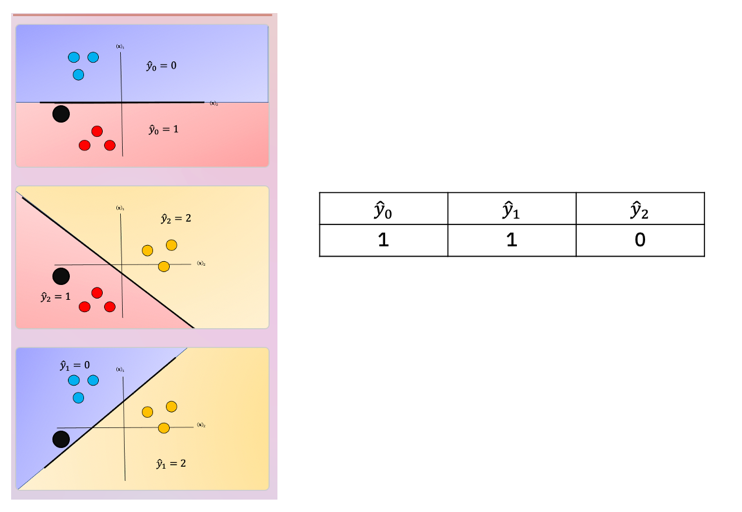

the black point represents a new sample.

the output of each classifier is shown in the table. 